<h1><center><u>Employee Attrition Prediction</u></center></h1>

<b>‘People Charm’, a growing company is facing a high attrition rate among their employees which in turn affects their business due to lack of expertise and experience. Their HR department is assigned the task to reduce the attrition rate by retaining employees who are about to churn out. They need to recommend special plans or strategies which will help them to retain their employees which in turn will help them to grow bigger as a company.

The file ‘People Charm Case.csv’ has several attributes. </b>

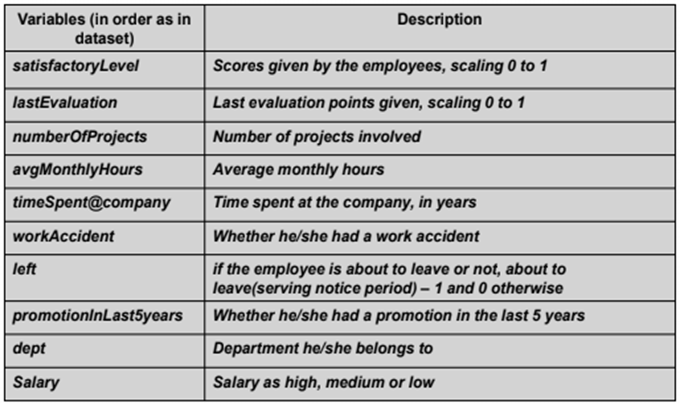

# Understanding the problem

* An attrition rate is a metric used to measure employees or customers lost over a period of time who are not replaced.
* “People Charm, a growing company is facing a high attrition rate among their employees ”- means the company is losing lots of their employees over the years and they want to reduce this rate by finding strategies that can help them retain their employees which in turn will help them to grow bigger as a company.
* In order to plan strategies, they have provided a dataset  containing various attributes. 
* We need to find the best fit model which can predict if a certain employee will work in the company for a longer period, or if he/she is planning to leave the company. 
* Using these predictions, the company can make their plans to avoid attrition.
* This is a Binary Classification Problem

# Step 1: Importing Libraries

In [76]:
# Data analysis tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For Train-Test Split
from sklearn.model_selection import train_test_split

# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics Tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Step 2: Loading the Dataset

In [77]:
df = pd.read_csv('People Charm case.csv')

In [78]:
df.head(10)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
5,0.10,0.77,6,247,4,0,1,0,sales,low
6,0.92,0.85,5,259,5,0,1,0,sales,low
7,0.42,0.53,2,142,3,0,1,0,sales,low
8,0.45,0.54,2,135,3,0,1,0,sales,low
9,0.11,0.81,6,305,4,0,1,0,sales,low


* The dataset ‘People Charm Case.csv’  contains 10 columns.
* Target Variable: “Left”
* Predictor Variables: 'satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'promotionInLast5years', 'dept', 'salary’.

# Step 3: Understanding the Structure of the Dataset

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Step 4: Data Pre-Processing

The dataset contains 14999 Entries, with a total of 10 columns. Out of the 10 columns, 2 columns have float64 type values, 6 columns have int64 type values and we have 2 columns with Categorical values.

The various steps for data Pre-Processing are:

a) Treating Missing Values

b) Finding and removing all the duplicated values

c) Checking for Imbalance

d) Checking Skewness of data

e) Identifying Outliers with Interquartile Range (IQR) and Boxplot Visualization

f) Converting the categorical data into numerical data appropriately

   # a) Treating Missing Values (Imputation)

In [80]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

The dataset does not have any null values. Hence no treatment for missing values required.
We can move on to the next step of Data Pre-Processing…

# b) Finding and removing all the duplicated values

In [81]:
len(df[df.duplicated()])

3008

The dataset had 3008 duplicate values. Retaining these values could lead to Over-fitting of data. Therefore, we need to remove these values before proceeding further.

Pandas has a method called drop_duplicates() that allows us to drop all the duplicate values. Using this method, we have removed all duplicate values.

In [82]:
# Removing all duplicates
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df[df.duplicated()])

0

# c) Checking for Imbalance

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Checking imbalance')

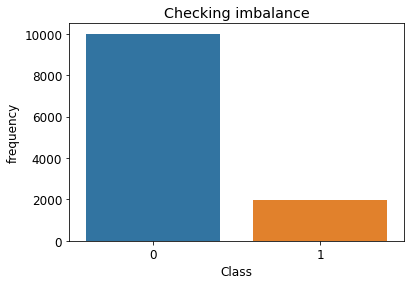

In [83]:
sns.countplot(df["left"])
plt.xlabel("Class")
plt.ylabel("frequency")
plt.title("Checking imbalance")

From the graph, it is clear that the class distribution is Imbalanced. The dataset has :

* 80% samples of class 0 - the employee is not leaving their job

* 20% samples of class 1 - The employee has decided to leave their job

Effect of Data imbalance:

Because the class distribution is not balanced, most machine learning algorithms will perform very well with very high accuracy (Sometimes more than 90%)on training data. But when applied to a new test dataset, the same model performs very poorly(having less than 60% accuracy). 
This is because, during training, the model simply predicts the majority class in all cases leading to very high accuracy. 
In this type of situations, Accuracy cannot be taken as a reliable metric to decide the best fit model.

# d) Checking Skewness of data

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


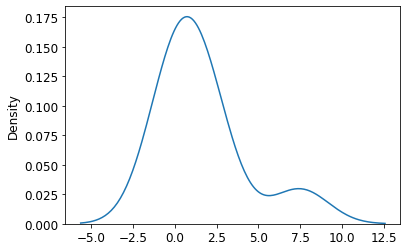

In [84]:
sns.distplot(df.skew(),hist=False)
plt.show()

Skewness refers to distortion or asymmetry in a symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. If there is too much skewness in the data, then the statistical model don’t work properly. This is because, in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance. Hence, we need to check for outliers.

# e) Identifying Outliers with Interquartile Range (IQR) and Boxplot Visualization

<b>Outliers are observations that are significantly different from other data points. Outliers can adversely affect the training process of a machine learning algorithm, resulting in very low accuracy.

Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training time, less accurate models and ultimately poorer results.

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1.</b>

In [85]:
# Printing interquartile range (IQR) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfactoryLevel         0.34
lastEvaluation            0.29
numberOfProjects          2.00
avgMonthlyHours          86.00
timeSpent.company         1.00
workAccident              0.00
left                      0.00
promotionInLast5years     0.00
dtype: float64


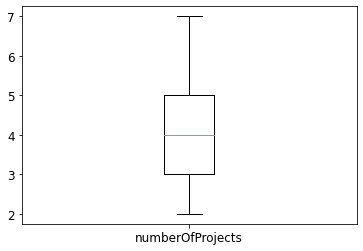

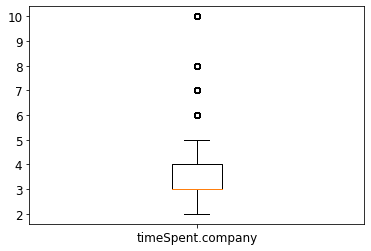

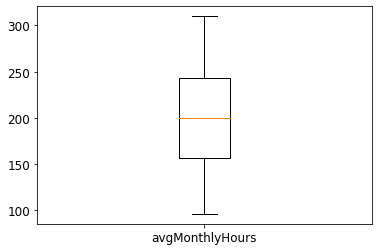

In [86]:
# Boxplot visualization for columns with high IQR

plt.boxplot([df["numberOfProjects"]])
plt.xticks([1],["numberOfProjects"])
plt.show()
plt.boxplot([df["timeSpent.company"]])
plt.xticks([1],["timeSpent.company"])
plt.show()
plt.boxplot([df["avgMonthlyHours"]])
plt.xticks([1],["avgMonthlyHours"])
plt.show()

<b>Here we can see that there are outliers in the timespent.company column in the dataset. There are two options here:
    
    
1) We can drop the entire column from the dataset

2) We can treat the outliers

The best option is to treat the outliers rather than removing the entire column. This way we will not lose more data.

I am using Capping method in order to treat the outliers</b>

In [87]:
# Identifying the Ideal min and maximum value

print(df['timeSpent.company'].quantile(0.10))
print(df['timeSpent.company'].quantile(0.90))

2.0
5.0


We will do the flooring (10th percentile) for the lower values and capping (the 90th percentile) for the higher values. These values will be used for quantile-based flooring and capping.

* For capping, the code below replaces all values greater than 5.0 with 5.0

* Similarly, for Flooring, the code replaces all values lesser than 2.0 with 2.0

In [88]:
# Capping and Flooring of Outliers

df["timeSpent.company"] = np.where(df["timeSpent.company"] <2.0, 2.0,df['timeSpent.company'])
df["timeSpent.company"] = np.where(df["timeSpent.company"] >5.0, 5.0,df['timeSpent.company'])

df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,sales,low
1,0.80,0.86,5,262,5.0,0,1,0,sales,medium
2,0.11,0.88,7,272,4.0,0,1,0,sales,medium
3,0.37,0.52,2,159,3.0,0,1,0,sales,low
4,0.41,0.50,2,153,3.0,0,1,0,sales,low


# f) Converting the categorical data into numerical data appropriately

scikit-learn only accepts numerical variables. Hence, we need to convert all categorical variables into numeric types.

In [89]:
cols=['dept', 'salary']
for label in cols:
    df[label]=LabelEncoder().fit_transform(df[label])
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3.0,0,1,0,7,1
1,0.80,0.86,5,262,5.0,0,1,0,7,2
2,0.11,0.88,7,272,4.0,0,1,0,7,2
3,0.37,0.52,2,159,3.0,0,1,0,7,1
4,0.41,0.50,2,153,3.0,0,1,0,7,1


# Correlation between each predictor and the target variable. 
<b>This can be done using the corr() method and we can visualize using seabors plotting method heatmap().</b>

In [90]:
# Correlation 
df.corr()["left"]

satisfactoryLevel       -0.350558
lastEvaluation           0.013520
numberOfProjects         0.030928
avgMonthlyHours          0.070409
timeSpent.company        0.264612
workAccident            -0.125436
left                     1.000000
promotionInLast5years   -0.044657
dept                     0.018286
salary                   0.004224
Name: left, dtype: float64

<AxesSubplot:>

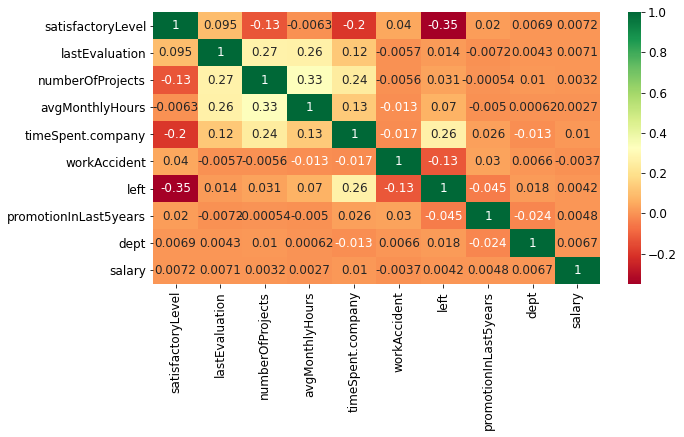

In [91]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), cmap = "RdYlGn", annot = True)

# Step 5: Data Visualization
# Independent Variables vs Target Variable

The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.
The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.

<AxesSubplot:xlabel='salary'>

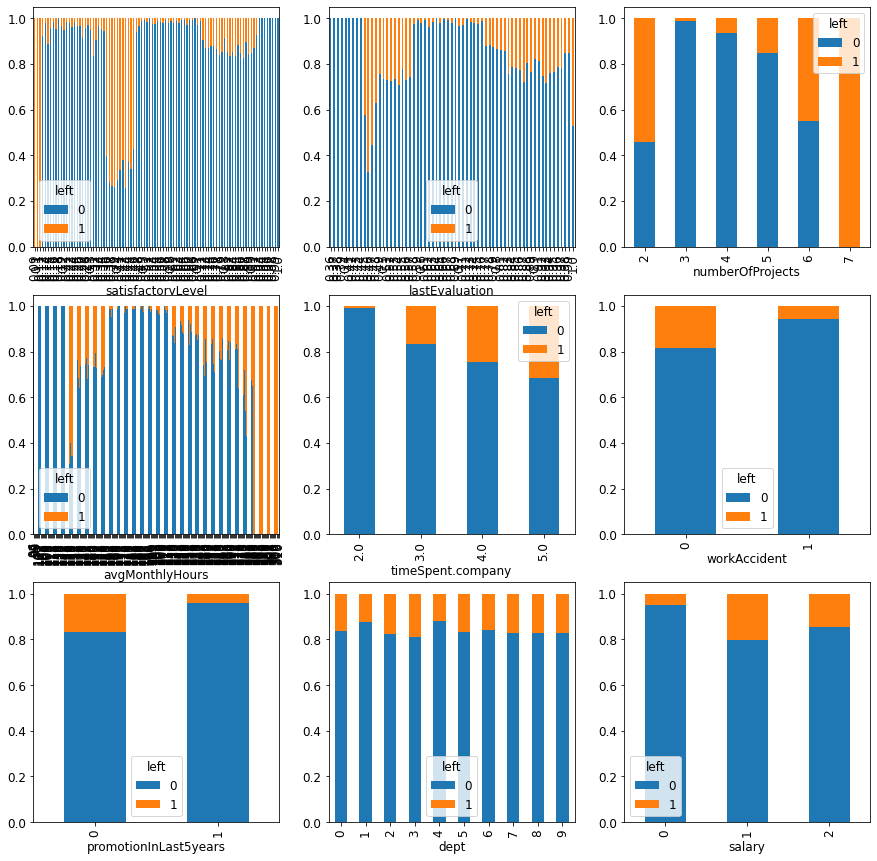

In [92]:
# satisfactoryLevel vs left
fig, ax = plt.subplots(3,3,figsize = (15,15))
satisfactoryLevel = pd.crosstab(df['satisfactoryLevel'],df['left'])
satisfactoryLevel.div(satisfactoryLevel.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

# lastEvaluation vs left
lastEvaluation = pd.crosstab(df['lastEvaluation'],df['left'])
lastEvaluation.div(lastEvaluation.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

# numberOfProjects vs left
numberOfProjects = pd.crosstab(df['numberOfProjects'],df['left'])
numberOfProjects.div(numberOfProjects.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

# avgMonthlyHours vs left
avgMonthlyHours = pd.crosstab(df['avgMonthlyHours'],df['left'])
avgMonthlyHours.div(avgMonthlyHours.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,0])

# timeSpent vs left
timeSpent = pd.crosstab(df['timeSpent.company'],df['left'])
timeSpent.div(timeSpent.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

# workAccident vs left
workAccident = pd.crosstab(df['workAccident'],df['left'])
workAccident.div(workAccident.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,2])

# promotionInLast5years vs left
promotionInLast5years= pd.crosstab(df['promotionInLast5years'],df['left'])
promotionInLast5years.div(promotionInLast5years.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,0])

# dept vs left
dept= pd.crosstab(df['dept'],df['left'])
dept.div(dept.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,1])

# salary vs left
salary= pd.crosstab(df['salary'],df['left'])
salary.div(salary.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[2,2])

# Step 6: Defining the Tatget and Predictor Variables and Standard Scaling

<b> 
* We know that our target variable is “left”. Hence, we define X (Predictor variables) and Y (Target Variable).
    
* If a feature’s variance is more than the variance of other features, that particular feature might dominate other features in the dataset. This could affect the accuracy of predictions. Hence, we need to scale all the features to a standard centered scale. For this purpose, we use StandardScaler() method.
    
* After Feature scaling, I am dividing the dataset into Train and test set at a ratio 80:20.</b>

In [93]:
scaler=StandardScaler()

In [94]:
X=df.drop(["left"],axis=1)
y=df["left"]

X =scaler.fit_transform(X)

In [95]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Step 7: Fitting the dataset to various models

<b>We will fit the dataset to various models and find out the best fit model among these.

Various models used in this notebook are:
    

1)  Logistic Regression

2)  KNN                

3)  Naive-Bayes       

4)  SVM                   

5)  Decision Tree         

6)  Gradient Boosting     

7)  Random Forest         

8)  AdaBoost             

9)  XGBoost    

</b>           

# 1) Logistic Regression

In [96]:
#Fitting the model

logistic_Regression = LogisticRegression(max_iter=3000,random_state=0,class_weight="balanced",solver = "saga")
logistic_Regression.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=0,
                   solver='saga')

In [97]:
# Applying the model to the x_test

y_pred = logistic_Regression.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [98]:
# Finding Accuracy

log = accuracy_score(y_test,y_pred)*100

In [99]:
# Confusion Matrix

cmlr=confusion_matrix(y_test, y_pred)
print(cmlr)

[[1563  444]
 [  41  351]]


In [100]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      2007
           1       0.44      0.90      0.59       392

    accuracy                           0.80      2399
   macro avg       0.71      0.84      0.73      2399
weighted avg       0.89      0.80      0.82      2399



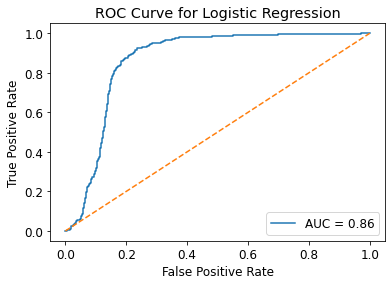

In [101]:
# Plotting the ROC Curve

prob_lr=logistic_Regression.predict_proba(x_test)
auc_lr = roc_auc_score(y_test,prob_lr[:,1])
fprlr,tprlr,_ = roc_curve(y_test,prob_lr[:,1])
roc_auc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label = "AUC = %.2f" % auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 2) KNN

In [102]:
#Fitting the model

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [103]:
# Applying the model to the x_test

pred_knn = knn.predict(x_test)
pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
# Finding Accuracy

KNN = accuracy_score(y_test, pred_knn)*100

In [105]:
# Confusion Matrix

cm_knn=confusion_matrix(y_test, pred_knn)
print(cm_knn)

[[1941   66]
 [  57  335]]


In [106]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2007
           1       0.84      0.85      0.84       392

    accuracy                           0.95      2399
   macro avg       0.90      0.91      0.91      2399
weighted avg       0.95      0.95      0.95      2399



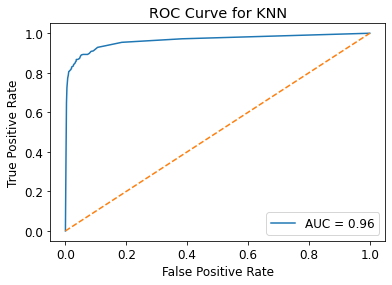

In [107]:
# Plotting the ROC Curve

prob_knn= knn.predict_proba(x_test)
auc_knn = roc_auc_score(y_test,prob_knn[:,1])
fprknn,tprknn,_= roc_curve(y_test,prob_knn[:,1])
roc_auc_knn=auc(fprknn,tprknn)
plt.plot(fprknn,tprknn,label = "AUC = %.2f" % auc_knn)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 3) Naive-Bayes

In [108]:
#Fitting the model

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [109]:
# Applying the model to the x_test

pred_gnb = gnb.predict(x_test)
pred_gnb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
# Finding Accuracy

GNB = accuracy_score(y_test, pred_gnb)*100

In [111]:
# Confusion Matrix

cm_gnb=confusion_matrix(y_test, pred_gnb)
print(cm_gnb)

[[1753  254]
 [  88  304]]


In [112]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2007
           1       0.54      0.78      0.64       392

    accuracy                           0.86      2399
   macro avg       0.75      0.82      0.78      2399
weighted avg       0.89      0.86      0.87      2399



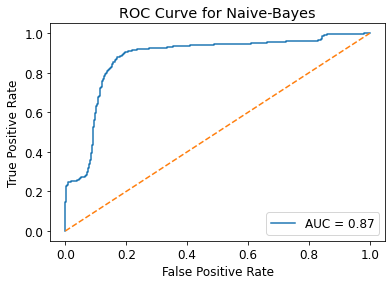

In [113]:
# Plotting the ROC Curve

prob_gnb= gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,prob_gnb[:,1])
fprgnb,tprgnb,_= roc_curve(y_test,prob_gnb[:,1])
roc_auc_gnb=auc(fprgnb,tprgnb)
plt.plot(fprgnb,tprgnb,label = "AUC = %.2f" % auc_gnb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive-Bayes")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 4) SVM

In [114]:
#Fitting the model

svc = SVC(probability=True)
svc.fit(x_train,y_train)

# Applying the model to the x_test
pred_svc = svc.predict(x_test)
pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
# Finding Accuracy

SVC = accuracy_score(y_test, pred_svc)*100

In [116]:
# Confusion Matrix

cm_svc=confusion_matrix(y_test, pred_svc)
print(cm_svc)

[[1968   39]
 [  43  349]]


In [117]:
# Classification Report that computes various 
#metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2007
           1       0.90      0.89      0.89       392

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



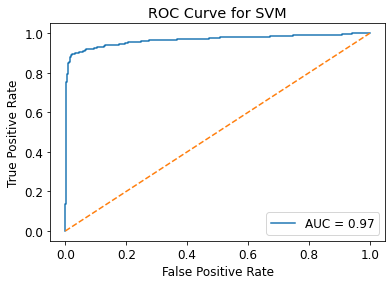

In [118]:
# Plotting the ROC Curve

prob_svc= svc.predict_proba(x_test)
auc_svc = roc_auc_score(y_test,prob_svc[:,1])
fprsvc,tprsvc,_= roc_curve(y_test,prob_svc[:,1])
roc_auc_svc=auc(fprsvc,tprsvc)
plt.plot(fprsvc,tprsvc,label = "AUC = %.2f" % auc_svc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 5) Decision Tree

In [119]:
#Fitting the model

dtree_en = DecisionTreeClassifier()
clf = dtree_en.fit(x_train,y_train)

In [120]:
# Applying the model to the x_test

pred_dt = clf.predict(x_test)
pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
# Finding Accuracy

DTREE = accuracy_score(y_test, pred_dt)*100

In [122]:
# Confusion Matrix

cm_dt=confusion_matrix(y_test,pred_dt)
print(cm_dt)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,pred_dt))

[[1954   53]
 [  29  363]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2007
           1       0.87      0.93      0.90       392

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399



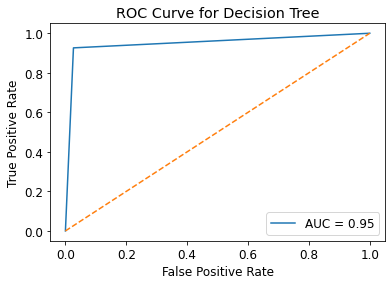

In [123]:
# Plotting the ROC Curve

prob_dt= dtree_en.predict_proba(x_test)
auc_dt = roc_auc_score(y_test,prob_dt[:,1])
fprdt,tprdt,_= roc_curve(y_test,prob_dt[:,1])
roc_auc_dt=auc(fprdt,tprdt)
plt.plot(fprdt,tprdt,label = "AUC = %.2f" % auc_dt)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 6) Gradient Boosting

In [124]:
#Fitting the model

GBC=GradientBoostingClassifier(n_estimators=150)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [125]:
# Applying the model to the x_test

Y_predict=GBC.predict(x_test)
Y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
# Finding Accuracy

gbc = accuracy_score(y_test,Y_predict)*100

In [127]:
# Confusion Matrix

cm_gbc=confusion_matrix(y_test,Y_predict)
print(cm_gbc)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test,Y_predict))

[[1988   19]
 [  28  364]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2007
           1       0.95      0.93      0.94       392

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



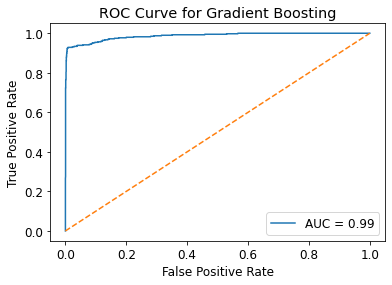

In [128]:
# Plotting the ROC Curve

prob_GBC= GBC.predict_proba(x_test)
auc_GBC = roc_auc_score(y_test,prob_GBC[:,1])
fprGBC,tprGBC,_= roc_curve(y_test,prob_GBC[:,1])
roc_auc_GBC=auc(fprGBC,tprGBC)
plt.plot(fprGBC,tprGBC,label = "AUC = %.2f" % auc_GBC)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 7) Random Forest

In [129]:
#Fitting the model

rfc = RandomForestClassifier(n_estimators=30,criterion='gini',random_state=1,max_depth=10)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=30, random_state=1)

In [130]:
# Applying the model to the x_test

pred_rf= rfc.predict(x_test)
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
# Finding Accuracy

RFC = accuracy_score(y_test,pred_rf)*100

In [132]:
# Confusion Matrix

cm_rf=confusion_matrix(y_test, pred_rf)
print(cm_rf)

[[1996   11]
 [  30  362]]


In [133]:
# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2026
           1       0.92      0.97      0.95       373

    accuracy                           0.98      2399
   macro avg       0.96      0.98      0.97      2399
weighted avg       0.98      0.98      0.98      2399



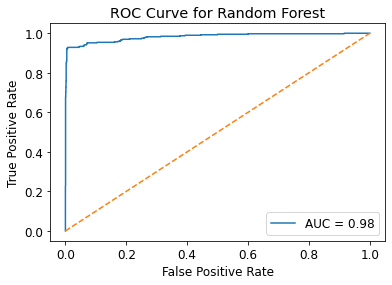

In [134]:
# Plotting the ROC Curve

prob_rfc= rfc.predict_proba(x_test)
auc_rfc = roc_auc_score(y_test,prob_rfc[:,1])
fprrfc,tprrfc,_= roc_curve(y_test,prob_rfc[:,1])
roc_auc_rfc=auc(fprrfc,tprrfc)
plt.plot(fprrfc,tprrfc,label = "AUC = %.2f" % auc_rfc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 8) AdaBoost (Entropy-Decision Tree)

In [135]:
#Fitting the model. Base model is chosen to be Decision Tree

model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=0),
                   n_estimators=80, random_state=0)

In [136]:
# Applying the model to the x_test

pred = adaboost.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
# Finding Accuracy

ada = accuracy_score(y_test,pred)*100

In [138]:
# Confusion Matrix

cm_ada=confusion_matrix(y_test, pred)
print(cm_ada)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, pred))

[[1952   55]
 [  39  353]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2007
           1       0.87      0.90      0.88       392

    accuracy                           0.96      2399
   macro avg       0.92      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399



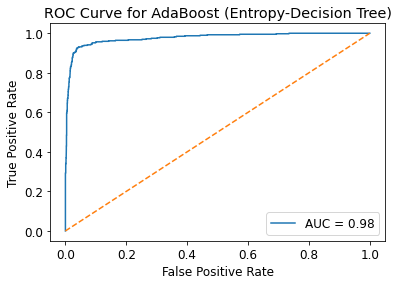

In [139]:
# Plotting the ROC Curve

prob_adaboost= adaboost.predict_proba(x_test)
auc_adaboost = roc_auc_score(y_test,prob_adaboost[:,1])
fpradaboost,tpradaboost,_= roc_curve(y_test,prob_adaboost[:,1])
roc_auc_adaboost=auc(fpradaboost,tpradaboost)
plt.plot(fpradaboost,tpradaboost,label = "AUC = %.2f" % auc_adaboost)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for AdaBoost (Entropy-Decision Tree)")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# 9) XGBoost 

In [140]:
#Fitting the model

xgb =  XGBClassifier(learning_rate =0.000001,n_estimators=1000,max_depth=5,min_child_weight=1,
                     subsample=0.8,colsample_bytree=0.8,nthread=4,scale_pos_weight=1,seed=27)
xgb.fit(x_train, y_train)

[20:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dines\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1e-06, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [141]:
# Applying the model to the x_test


predxg = xgb.predict(x_test)

# Finding Accuracy
xg = accuracy_score(y_test,predxg)*100


In [142]:
# Confusion Matrix

cm_xg=confusion_matrix(y_test, predxg)
print(cm_xg)

# Classification Report that computes various 
# metrics like Precision, Recall and F1 Score

print(classification_report(y_test, predxg))

[[1995   12]
 [  37  355]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2007
           1       0.97      0.91      0.94       392

    accuracy                           0.98      2399
   macro avg       0.97      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



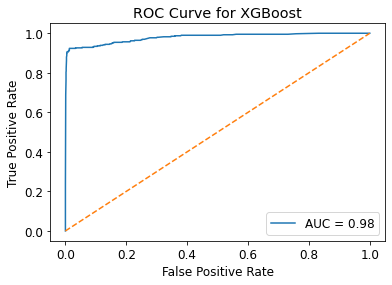

In [143]:
# Plotting the ROC Curve

prob_xgb= xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,prob_xgb[:,1])
fprxgb,tprxgb,_= roc_curve(y_test,prob_xgb[:,1])
roc_auc_xgb=auc(fprxgb,tprxgb)
plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

# Step 8: Choosing the Best model

There are various ways to evaluate a classification model. Some of them are:
 
1) Accuracy
    
2) AUC
    
3) ROC
    
4) f1 Score
    
5) Type I Error

I am evaluating with all these metrics in order to find the best fit model

# Confusion Matrix

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. Confusion Matrix gives us a matrix as output and describes the complete performance of the model.

The correct predictions falls on the diagonal line of the matrix.

4 important terms in Confusion Matrix:

<b>True Positives</b>  : We predict YES and the actual output is also YES.

<b>True Negatives</b>  : We predict NO and the actual output is NO.

<b>False Positives(Type I Error)</b> : We predict YES but the actual output is NO.

<b>False Negatives(Type II error)</b> : We predict NO but the actual output is YES.

<b>The Confusion matrix in itself is not a performance measure, but almost all of the performance metrics are based on Confusion Matrix.


# 1) Accuracy

In [144]:
# Accuracy values for all the models
print("1)  Logistic Regression    :",round(log, 2))
print("2)  KNN                    :",round(KNN, 2))
print("3)  Naive-Bayes            :",round(GNB, 2))
print("4)  SVM                    :",round(SVC, 2))
print("5)  Decision Tree          :",round(DTREE, 2))
print("6)  Gradient Boosting      :",round(gbc, 2))
print("7)  Random Forest          :",round(RFC, 2))
print("8)  AdaBoost               :",round(ada, 2))
print("9)  XGBoost                :",round(xg, 2))

1)  Logistic Regression    : 79.78
2)  KNN                    : 94.87
3)  Naive-Bayes            : 85.74
4)  SVM                    : 96.58
5)  Decision Tree          : 96.58
6)  Gradient Boosting      : 98.04
7)  Random Forest          : 98.29
8)  AdaBoost               : 96.08
9)  XGBoost                : 97.96


Arranging the accuracy values in order:

1)  Random Forest          : 98.29 %

2)  Gradient Boosting      : 98.04 %

3)  XGBoost                : 97.96 %

4)  SVM                    : 96.58 %

5)  Decision Tree          : 96.54 %

6)  AdaBoost               : 96.08 %

7)  KNN                    : 94.87 %

8)  Naive-Bayes            : 85.74 %

9)  Logistic Regression    : 79.78 % 





Here, <b>Random Forest Classifier has the highest accuracy rate.</b> But during Data visualization step, we observed that the <b>class distribution is Imbalanced</b>. The dataset has 80% samples of class 0 (the employee is not leaving their job) and 20% samples of class 1(The employee has decided to leave their job). This is the reason why most of the models are getting accuracy above 90% by simply predicting every training sample belonging to class 0. But, when we apply this model to a new test-set, then the <b>test accuracy would drop to less than 60%.</b>

<b>In this case, Accuracy metric proves to be a poor indicator of model performance. Therefore, we need to consider other metrics before deciding the best model.</b>

# 2) Area Under Curve (AUC)

In [145]:
# Area Under the Curve(AUC) of all the models
print('Area under the curve for Logistic Regression :',round(roc_auc, 2))
print('Area under the curve for KNN                 :',round(roc_auc_knn, 2))
print('Area under the curve for Naive-Bayes         :',round(roc_auc_gnb, 2))
print('Area under the curve for SVM                 :',round(roc_auc_svc, 2))
print('Area under the curve for Decision Tree       :',round(roc_auc_dt, 2))
print('Area under the curve for Gradient Boosting   :',round(roc_auc_GBC, 2))
print('Area under the curve for Random Forest       :',round(roc_auc_rfc, 2))
print('Area under the curve for AdaBoost            :',round(roc_auc_adaboost, 2))
print('Area under the curve for XGBoost             :',round(roc_auc_xgb, 2))

Area under the curve for Logistic Regression : 0.86
Area under the curve for KNN                 : 0.96
Area under the curve for Naive-Bayes         : 0.87
Area under the curve for SVM                 : 0.97
Area under the curve for Decision Tree       : 0.95
Area under the curve for Gradient Boosting   : 0.99
Area under the curve for Random Forest       : 0.98
Area under the curve for AdaBoost            : 0.98
Area under the curve for XGBoost             : 0.98


The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values. AUC calculates the area under the ROC curve, and therefore it is between 0 and 1.<b> For any classifier, the higher the AUC of a model the better it is.</b> The AUC values of all the models are listed below:

1)  Gradient Boosting      : 0.99

2)  Random Forest          : 0.98

3)  XGBoost                : 0.98

4)  AdaBoost               : 0.98

5)  SVM                    : 0.97

6)  KNN                    : 0.96

7)  Decision Tree          : 0.95

8)  Naive-Bayes            : 0.87

9)  Logistic Regression    : 0.86

Here, <b>Gradient Boosting</b> has the highest AUC value. Hence, based on the AUC values, Gradient Boosting is the best fit model.

# 3) ROC Curve

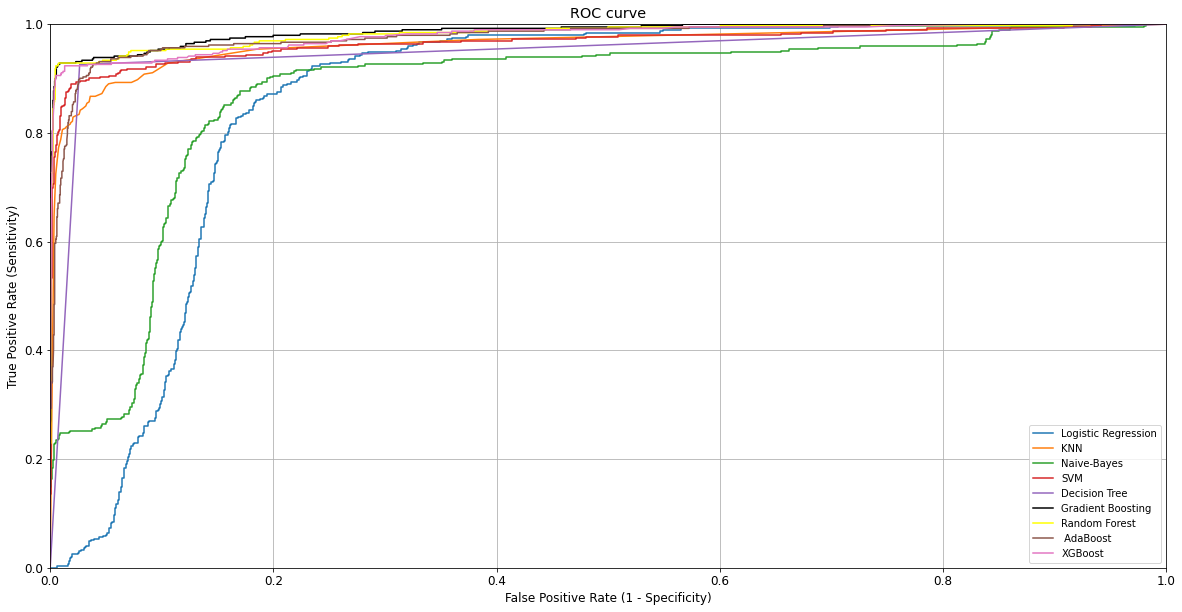

In [146]:
#ROC Curve for all models
plt.figure(figsize = (20,10))
plt.plot(fprlr,tprlr,label = "Logistic Regression")
plt.plot(fprknn,tprknn,label = "KNN")
plt.plot(fprgnb,tprgnb,label = "Naive-Bayes")
plt.plot(fprsvc,tprsvc,label = "SVM")
plt.plot(fprdt,tprdt,label = "Decision Tree")
plt.plot(fprGBC,tprGBC,label = "Gradient Boosting",color='black')
plt.plot(fprrfc,tprrfc,label = "Random Forest",color='yellow')
plt.plot(fpradaboost,tpradaboost,label = " AdaBoost")
plt.plot(fprxgb,tprxgb,label = "XGBoost")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

The <b>Receiver Operating Characteristic (ROC)</b> curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. ROC curve is one of the most effective evaluation metrics because it visualizes the accuracy of predictions for a whole range of cutoff values. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for all possible threshold values. <b>A model is said to be the best model when the ROC is close to the upper left corner.</b>

Looking at the ROC curve plot above, the <b>black curve (Gradient Boosting), is the curve that is closest to the upper left corner. Hence, based on the ROC plot, Gradient Boosting is the best fit model.</b>

# 4) F1-Score

In [147]:
# f1_score of all models
print("1)  Logistic Regression    :",round(f1_score(y_pred,y_test), 2))
print("2)  KNN                    :",round(f1_score(pred_knn,y_test), 2))
print("3)  Naive-Bayes            :",round(f1_score(pred_gnb,y_test), 2))
print("4)  SVM                    :",round(f1_score(pred_svc,y_test), 2))
print("5)  Decision Tree          :",round(f1_score(pred_dt,y_test), 2))
print("6)  Gradient Boosting      :",round(f1_score(Y_predict,y_test), 2))
print("7)  Random Forest          :",round(f1_score(pred_rf,y_test), 2))
print("8)  AdaBoost               :",round(f1_score(pred,y_test), 2))
print("9)  XGBoost                :",round(f1_score(predxg,y_test), 2))

1)  Logistic Regression    : 0.59
2)  KNN                    : 0.84
3)  Naive-Bayes            : 0.64
4)  SVM                    : 0.89
5)  Decision Tree          : 0.9
6)  Gradient Boosting      : 0.94
7)  Random Forest          : 0.95
8)  AdaBoost               : 0.88
9)  XGBoost                : 0.94


<b>Precision</b>           - It is the number of True Positive divided by the number of positive results predicted by the classifier.

<b>Recall/ Sensitivity</b> - It is the number of True Positives divided by the number of all relevant samples

<b>F1 Score</b>            - F1 Score is the Harmonic Mean between precision and recall.

F1 Score tells how precise the classifier is (how many values it classifies correctly).

<b>The greater the F1 Score, the better is the performance of our model.</b>

f1_Scores for all the models are:

1)  Random Forest          : 0.95

2)  Gradient Boosting      : 0.94

3)  XGBoost                : 0.94

4)  Decision Tree          : 0.9

5)  SVM                    : 0.89

6)  AdaBoost               : 0.88

7)  KNN                    : 0.84

8)  Naive-Bayes            : 0.64

9)  Logistic Regression    : 0.59

Here, <b>Random Forest</b> has the highest f1_score. Hence, based on the f1_score, Random Forest is the best fit model.

# 5)Type I Error

In [148]:
#Accessing the False Positives of all models from their confusion Matrix
print("1)  Logistic Regression    :",cmlr[0][1])
print("2)  KNN                    :",cm_knn[0][1])
print("3)  Naive-Bayes            :",cm_gnb[0][1])
print("4)  SVM                    :",cm_svc[0][1])
print("5)  Decision Tree          :",cm_dt[0][1])
print("6)  Gradient Boosting      :",cm_gbc[0][1])
print("7)  Random Forest          :",cm_rf[0][1])
print("8)  AdaBoost               :",cm_ada[0][1])
print("9)  XGBoost                :",cm_xg[0][1])

1)  Logistic Regression    : 444
2)  KNN                    : 66
3)  Naive-Bayes            : 254
4)  SVM                    : 39
5)  Decision Tree          : 53
6)  Gradient Boosting      : 19
7)  Random Forest          : 11
8)  AdaBoost               : 55
9)  XGBoost                : 12


False Positives(Type I Error) occurs when we incorrectly reject a true hypothesis.<b>Lower the value of False Positives, better is the model</b>. This is because, while predicting, <b>if we predict that an employee is not going to leave the job, but later he/she actually leaves the job, then this kind of wrong prediction could further increase Attrition Rate to an alarming range.</b>

The False Positives(Type I Error) for all the models can be accessed from the confusion matrix. The values for various models are:


1)  Naive-Bayes            : 88

2)  KNN                    : 57

3)  Decision Tree          : 53

4)  AdaBoost               : 39

5)  SVM                    : 43

6)  Logistic Regression    : 41

7)  XGBoost                : 37

8)  Random Forest          : 30

9)  Gradient Boosting      : 19

<b>Gradient Boosting algorithm has the least number of False Positives(Type I Error). Hence, based on the False Positives(Type I Error), Gradient Boosting is the best fit model.</b>

# Step 9: Finalizing the Best Model

After all the comparison using 5 different metrics:

when considering the metrics AUC, ROC and Type I error, Gradient Boosting is found to be the best model.

when considering the metrics Accuracy and F1 Score, Random Forest is found to be the best model.

# Finally, <u><b>Gradient Boosting</b></u> algorithm proves to be the best model for the Employee Attrition dataset (People Charm case.csv).
